In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

get_bins = lambda ser: np.logspace(np.log10(ser.min()+1e-5),np.log10(ser.max()+1e-5),100)

Load data for swarms and adults

In [4]:
adults = pd.read_csv('Adults.csv')
swarms = pd.read_csv('Swarms.csv')
metadata = pd.read_excel('Locust_Hub_Data_-_Column_Description.xlsx')

We first analyze the data to see if we have the two relevant quantities - area and density

We begin by focusing on a single group of locust - gregarioius adults

In [54]:
# these are the relevant columns for area
metadata[metadata.Description.str.contains('area')==True]

,Locust & Control columns,Description,Value
7,AREAHA,surveyed area,numeric
70,GHPMINAHA,gregarious hopper minimum area (ha),numeric
71,GHPMAXAHA,gregarious hopper maximum area (ha),numeric
72,GHPARVSML,gregarioius hopper area = very small,"no (0), yes (1)"
73,GHPARSML,gregarioius hopper area = small,"no (0), yes (1)"
74,GHPARMED,gregarioius hopper area = medium,"no (0), yes (1)"
75,GHPARLGE,gregarioius hopper area = large,"no (0), yes (1)"
76,GHPARVLGE,gregarioius hopper area = very large,"no (0), yes (1)"
77,GHPARUNK,gregarioius hopper area = unknown,"no (0), yes (1)"
117,GADMINASKM,gregarious adult minimum area (km2),numeric


In [19]:
# these are the relevant columns for density
metadata[metadata.Description.str.contains('den')==True]

,Locust & Control columns,Description,Value
18,SHPMINDSQM,solitary hopper minimum density/m2,numeric
19,SHPMAXDSQM,solitary hopper maximum density/m2,numeric
20,SHPMINDSIT,solitary hopper minimum density/site,numeric
21,SHPMAXDSIT,solitary hopper maximum density/site,numeric
22,SHPDENISOL,solitary hopper density = isolated,"no (0), yes (1)"
23,SHPDENSCAT,solitary hopper density = scattered,"no (0), yes (1)"
24,SHPDENGRP,solitary hopper density = group,"no (0), yes (1)"
25,SHPDENUNK,solitary hopper density = unknown,"no (0), yes (1)"
47,GHPMINDSQM,gregarious hopper minimum density/m2,numeric
48,GHPMAXDSQM,gregarious hopper maximum density/m2,numeric


Let's see how many 

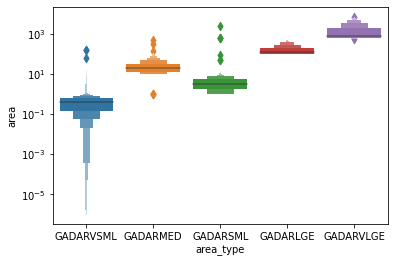

In [80]:
area_cols = ['GADARVSML','GADARSML','GADARMED','GADARLGE','GADARVLGE']
x  = swarms.loc[swarms.GADMAXASKM!=0,area_cols]
x['area_type'] = np.nan
for col in area_cols:
    x.loc[x[col]==1,'area_type'] = col
x['area'] = swarms.loc[x.index,'GADMAXASKM']
ax = sns.boxenplot(x='area_type',y='area',data=x)
ax.set_yscale('log')

The relevant columns to look for are:


In [18]:
adults.STARTDATE= pd.to_datetime(adults.STARTDATE)
adults[adults.STARTDATE>'2021-03-01']

,X,Y,OBJECTID,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,LOCNAME,...,CTLQTYU,CTLARTREA,CTLARTREAU,CTLAPPHAND,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT
119743,39.875000,7.608889,168289,2021-03-01 23:00:00+00:00,00:00,2021/03/01 23:00:00+00,00:00,No,Early,Oromia,...,,0.0,,0,0,0,0,0,0,Adult
119744,40.093611,7.840833,168290,2021-03-01 23:00:00+00:00,02:11,2021/03/01 23:00:00+00,02:11,No,Early,Arsi zone Gololcha,...,,0.0,,0,0,0,0,0,0,Adult
119745,40.107500,7.840833,168291,2021-03-01 23:00:00+00:00,01:30,2021/03/01 23:00:00+00,01:30,No,Early,Arsi Zone seru dist,...,,0.0,,0,0,0,0,0,0,Adult
119746,40.174444,7.786667,168292,2021-03-02 23:00:00+00:00,01:44,2021/03/02 23:00:00+00,01:44,No,Early,Seru Bulala kebele,...,l,400.0,ha,0,0,1,0,0,95,Adult
119748,34.873333,17.101944,168294,2021-03-12 23:00:00+00:00,13:21,2021/03/12 23:00:00+00,13:21,No,Middle,Adrama,...,,0.0,,0,0,0,0,0,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120360,47.662222,27.574444,168906,2021-03-30 21:59:59+00:00,00:00,2021/03/30 21:59:59+00,00:00,No,Late,,...,l,20.0,ha,0,1,0,0,0,0,Adult
120361,38.728611,23.973889,168907,2021-03-29 21:59:59+00:00,18:13,2021/03/29 21:59:59+00,18:13,No,Late,Al Madinah,...,l,40.0,ha,0,1,0,0,0,85,Adult
120362,38.852778,23.938611,168908,2021-03-29 21:59:59+00:00,09:31,2021/03/29 21:59:59+00,09:31,No,Late,Al Madinah,...,l,50.0,ha,0,1,0,0,0,85,Adult
120363,48.410000,27.371111,168909,2021-03-29 21:59:59+00:00,00:00,2021/03/29 21:59:59+00,00:00,No,Late,,...,l,40.0,ha,0,1,0,0,0,0,Adult


In [24]:
np.logspace(np.log10(adults.GADMAXDHA.min()+1e-5),np.log10(adults.GADMAXDHA.max()+1e-5),100)

array([1.00000000e-05, 1.33669255e-05, 1.78674698e-05, 2.38833137e-05,
       3.19246475e-05, 4.26734386e-05, 5.70412675e-05, 7.62466373e-05,
       1.01918312e-04, 1.36233449e-04, 1.82102236e-04, 2.43414702e-04,
       3.25370619e-04, 4.34920483e-04, 5.81354970e-04, 7.77092858e-04,
       1.03873423e-03, 1.38846831e-03, 1.85595525e-03, 2.48084156e-03,
       3.31612243e-03, 4.43263615e-03, 5.92507173e-03, 7.91999924e-03,
       1.05866040e-02, 1.41510347e-02, 1.89155827e-02, 2.52843184e-02,
       3.37973601e-02, 4.51766795e-02, 6.03873310e-02, 8.07192955e-02,
       1.07896881e-01, 1.44224957e-01, 1.92784426e-01, 2.57693506e-01,
       3.44456990e-01, 4.60433092e-01, 6.15457484e-01, 8.22677435e-01,
       1.09966680e+00, 1.46991642e+00, 1.96482633e+00, 2.62636872e+00,
       3.51064750e+00, 4.69265636e+00, 6.27263880e+00, 8.38458956e+00,
       1.12076184e+01, 1.49811400e+01, 2.00251783e+01, 2.67675066e+01,
       3.57799267e+01, 4.78267615e+01, 6.39296759e+01, 8.54543215e+01,
      

In [31]:
swarms.loc[swarms.GADMAXDHA.argmax()].to_dict()

{'X': 15.201944444,
 'Y': 14.120555556000099,
 'OBJECTID': 6063,
 'STARTDATE': '1988/10/20 00:00:00+00',
 'TmSTARTDAT': '12:00',
 'FINISHDATE': '1988/10/20 00:00:00+00',
 'TmFINISHDA': '12:00',
 'EXACTDATE': 'No',
 'PARTMONTH': 'Middle',
 'LOCNAME': '12 km W Mao',
 'AREAHA': 0.0,
 'LOCRELIAB': 'Exact',
 'COUNTRYID': 'CD',
 'LOCUSTID': 218564,
 'REPORTID': 'RAMSES38_1988TOFAOLC',
 'ACOMMENT': '(**RefFalse----1726-',
 'LOCPRESENT': 1,
 'SPECIESQRY': 0,
 'CONFIRMATN': 1,
 'BREEDING': 2,
 'REPRELIAB': 1,
 'SHPMINDSQM': 0.0,
 'SHPMAXDSQM': 0.0,
 'SHPMINDSIT': 0,
 'SHPMAXDSIT': 0,
 'SHPDENISOL': 0,
 'SHPDENSCAT': 0,
 'SHPDENGRP': 0,
 'SHPDENUNK': 0,
 'SHPSC': 0,
 'SHPSCCAT': 0,
 'SHPMATEGG': 0,
 'SHPMATHAT': 0,
 'SHPMATINS1': 0,
 'SHPMATINS2': 0,
 'SHPMATINS3': 0,
 'SHPMATINS4': 0,
 'SHPMATINS5': 0,
 'SHPMATINS6': 0,
 'SHPMATFLED': 0,
 'SHPMATUNK': 0,
 'SHPCOLGN': 0,
 'SHPCOLGNYL': 0,
 'SHPCOLGNBK': 0,
 'SHPCOLYLBK': 0,
 'SHPCOLBK': 0,
 'SHPAPPSOL': 0,
 'SHPAPPTRAN': 0,
 'SHPAPPGREG': 0,
 'S

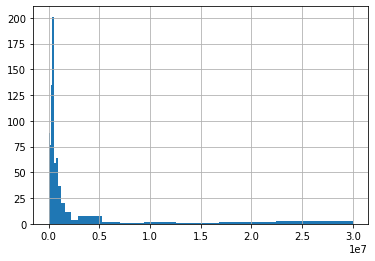

In [93]:
# adults.GADMAXDHA.hist(bins=np.logspace(np.log10(adults.GADMAXDHA.min()+1e-5),np.log10(adults.GADMAXDHA.max()+1e-5),100))
adults.GADMAXDHA.hist(bins=get_bins(adults.GADMAXDHA))